# Question: How to learn coding in 2023?
In this python file I examine the question how a starter should learn coding in 2023. To answer this question I use the survey restults from the Stackoverflow Developer Survey 2022. 

## Gather data

In [80]:
#install packages
import numpy as np
import pandas as pd
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules
%matplotlib inline

#read in the data & explore columns
df = pd.read_csv('survey_results_public22.csv')
schema_df = pd.read_csv('survey_results_schema22.csv')
df.head()

/Users/Kenneth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write code sometimes as part of my work","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Books / Physical media;Friend or family member;Other online resources (e.g., videos, blogs, foru...",Technical documentation;Blogs;Programming Games;Written Tutorials;Stack Overflow,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., University, College, etc)",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc);On t...",Technical documentation;Blogs;Stack Overflow;Online books;Video-based Online Courses;Online chal...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


## Examine Data
In this next section I examine the size of the data and the frequency of the NaN values. Most importantly however, I identify the relevant column for the posed question and examine its values on NaNs. 
In the last step I examine the type of developers which participated in the survey in order to assess the value of the given opinions with respect to our qustion. 

In [2]:
#print number of rows and cols
print("number of cols:", df.shape[1])
print("number of rows:", df.shape[0])

number of cols: 79
number of rows: 73268


In [7]:
#check if the data is full of Nan
NAN_percentages = pd.DataFrame(data = df.isna().sum() / df.shape[0], columns = ["percentages"])
upperQuartile = NAN_percentages.loc[NAN_percentages["percentages"] >= 0.75]
most_missing_cols = set(upperQuartile.index) #Provide a set of columns with more than 75% of the values missing
most_missing_cols

{'VCHostingPersonal use', 'VCHostingProfessional use'}

In [3]:
#function for obtain question descriptions
def get_description(column, schema = schema_df): 
    
    '''
    input: column (str) and schema (df)
    output: the description of the column from the schema (str)
    
    '''
    question = list(schema[schema["qname"] == column]["question"])[0]
    return question
    
    

In [94]:
#search for a column on coding education
schema_df["qname"].unique()

/Users/Kenneth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['S0', 'MetaInfo', 'S1', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'S2', 'EdLevel', 'LearnCode',
       'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence',
       'BuyNewTool', 'Country', 'Currency', 'CompTotal', 'CompFreq', 'S3',
       'Language', 'Database', 'Platform', 'Webframe', 'MiscTech',
       'ToolsTech', 'NEWCollabTools', 'OpSys', 'VersionControlSystem',
       'VCInteraction', 'VCHosting', 'OfficeStackAsync',
       'OfficeStackSync', 'Blockchain', 'S4', 'NEWSOSites', 'SOVisitFreq',
       'SOAccount', 'SOPartFreq', 'SOComm', 'S5', 'Age', 'Gender',
       'Trans', 'Sexuality', 'Ethnicity', 'Accessibility', 'MentalHealth',
       'S6', 'TBranch', 'ICorPM', 'WorkExp', 'Knowledge', 'Frequency',
       'TimeSearching', 'TimeAnswering', 'Onboarding', 'ProfessionalTech',
       'SOTeamsUsage', 'TrueFalse', 'S7', 'SurveyLength', 'SurveyEase',
       'Knowledge_1', 'Knowledge_2',

In [99]:
#identify the right question
get_description("LearnCode")

/Users/Kenneth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'How did you learn to code? Select all that apply.'

In [90]:
print("percentage of NaN values in column of interest:", (df["LearnCode"].isna().sum() / df.shape[0])*100)

percentage of NaN values in column of interest: 2.3038707211879674


/Users/Kenneth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
#plotting dev types
def plot(df):
    fig = plt.figure(figsize=[10,6], tight_layout = True)
    colors = sns.color_palette('pastel')
    ax = fig.add_axes([0,0,1,1])
    labels = ['professional dev', 'learns to code','codes at work sometimes','hobby coder', 'past dev', 'other', ]
    status_vals = list(df.groupby("MainBranch")["MainBranch"].count()/df.shape[0])
    ax.barh(labels,status_vals, color=colors[:5])
    plt.xlabel('proportion in dataset')
    plt.ylabel('Dev Type')
    plt.title('Developer Types')
    plt.show()

/Users/Kenneth/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


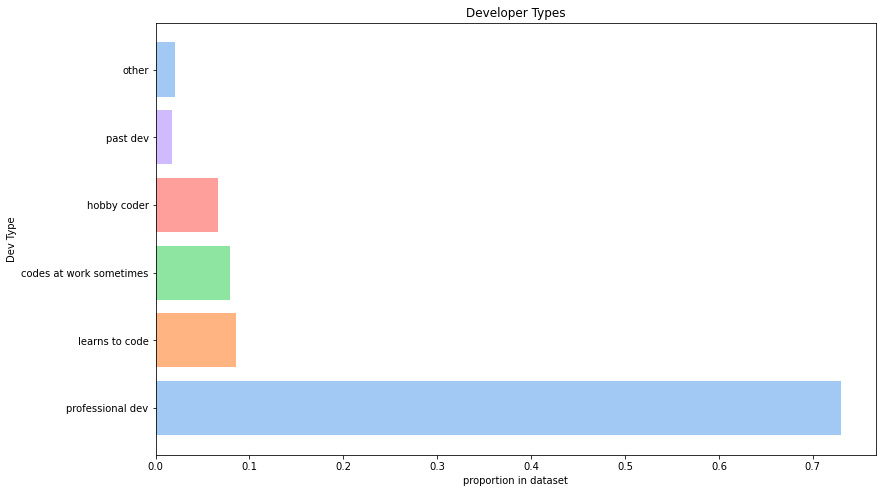

In [10]:
plot(df)

#### Conclusion Data examination. 
Overall the data set appears to be of high quality with low NaN values, especially in our column of interest. However, to answer the question posed at the beginning only the recommendation of experts is relevant. Thus the data needs to be cleaned and prepared in the next step. 

## Data Preparation

#### Filtering out unprofessional coders. 
We will focus completely on the currently active developers by filtering out the rest. Advice from aspiring or hobby coders might be not reliable. 

In [13]:
#filter function
def filter_columns(df, cols, col = "MainBranch"):
    '''
    Input: 
    df: dataframe
    cols: columns which should not be deleted
    col: string indicating the column according to which we should filter
    '''
    df_filtered = df.loc[df[col].isin(cols)]\
    return df_filtered
    

In [24]:
#filter out unprofessional coders
options = ["I am a developer by profession", "I am not primarily a developer, but I write code sometimes as part of my work"]
df_filtered = filter_columns(df = df, cols = options)

#### Dropping NaNs and restructuring data
NaNs were only a few (2 percent). Plus we only assess one column and perform no prediction whatsoever, where NaN could contain relevant information. Thus it should be fine to kick them out. 
Further the Wordcloud needs a string of all itemsets in the data, while the apriori algorithm needs a nice list of lists containing the split up items in each set per individual to work. The according data preperation is done in the next steps. 

In [71]:
#clean & prepare data for wordcloud and apriori
def clean_prepare(df_filtered = df_filtered, column = "LearnCode"): 
    '''
    Input: 
    a data frame df_filtered
    a string for column
    
    Output: 
    a dataframe without nas, 
    an association data frame used for apriory, 
    and a concatenated string containing all the contents in our column.
    '''
    
    df_noNa = df_filtered[column].dropna() #drop NA values since they weren't many and we are not doing any regression. NA in our simple data exploration bare no information. 
    data = list(df_noNa.apply(lambda x:x.split(";") )) #split data by ";" => creates list of elements in each set of education methods per person
    
    #run apriori algorithm and obtain 1-hot itemset count
    a = TransactionEncoder() #initialize data transformer
    a_data = a.fit(data).transform(data) #transform data 
    df_associate = pd.DataFrame(a_data,columns=a.columns_) 
    df_associate = df_associate.replace(False,0)#transform False to 0. Result: one hot encoded
    
    #concatenate column contens
    text_str = ' '.join(sum(data, []))
    return df_noNa, df_associate, text_str


/Users/Kenneth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
#run the functino to obtain the cleaned and prepared data
df_noNa, df_associate, text_str = clean_prepare(df_filtered)

/Users/Kenneth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Evaluation & Modelling

In [65]:
def create_wordcloud(text = text_str):
    '''
    This function takes the concatenated string values prepared in the stage before and plots a wordcloud based on appearance frequency
    input: a string
    output: a wordcloud figure
    '''
    
    
    stops = STOPWORDS.union(set({'e', 'g', 'resources', 'etc'})) ##add some additional specific stopwords
    plt.figure(figsize=[15,10])
    # plot the wordcloud
    wordcloud = WordCloud(background_color="white", collocations = False, stopwords=stops, max_words=20, width=1000, height=500).generate(text) 
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.imshow(wordcloud)
    plt.axis("off")

/Users/Kenneth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/Kenneth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


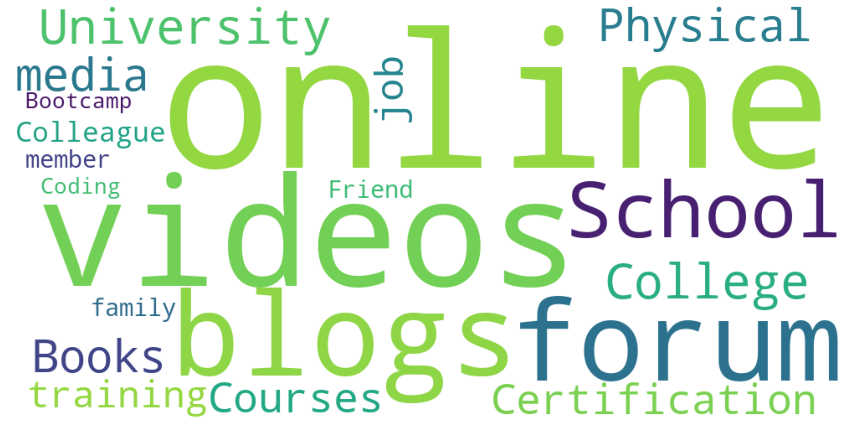

In [66]:
create_wordcloud(text = text_str)

In [79]:
#run apriori to calculate the support for each itemset
pd.options.display.max_colwidth = 100 #ensures the whole itemsets are displayed
associations = apriori(df_associate, min_support = 0.2, use_colnames = True, verbose = 1)
associations.sort_values(by = "support", ascending = False).head(7) #sort by support value and only depict the 7 highest itemsets

Processing 12 combinations | Sampling itemset size 4


/Users/Kenneth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/Kenneth/opt/anaconda3/lib/python3.8/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
4,0.696524,"(Other online resources (e.g., videos, blogs, forum))"
5,0.655794,"(School (i.e., University, College, etc))"
0,0.567694,(Books / Physical media)
3,0.463420,(Online Courses or Certification)
2,0.456710,(On the job training)
15,0.446063,"(School (i.e., University, College, etc), Other online resources (e.g., videos, blogs, forum))"
8,0.417891,"(Other online resources (e.g., videos, blogs, forum), Books / Physical media)"


## Evaluation
So most developers recommend online resources, while university comes second, followed by good old books and online courses. For all those that are not considering to pursue a degree in computer science, data science or the likes, the following learning scenario could be inferred out of the table above:

Find someting (maybe a book) you find interesting >> watch a tutorial, read blogs, do an online course >> try to do it on your own >> make mistakes >> go in forums and learn >>repeat